# **ДЗ №4 STEM. Алексеев Виталий**

## **0 Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Raven-ES1617/cu/refs/heads/main/science_studio/whole_data_practice_4.csv"
)
df.set_index(["RAJ2000", "DEJ2000"], inplace=True)
df.drop(columns=[col for col in df.columns if col.startswith("e_")], axis=1, inplace=True)
df["present"] = pd.Categorical(df["present"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 56298 entries, (np.float64(168.580444), np.float64(1.051704)) to (np.float64(124.382068), np.float64(19.629855))
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Vmag     56298 non-null  float64 
 1   Bmag     56298 non-null  float64 
 2   gpmag    56298 non-null  float64 
 3   rpmag    56298 non-null  float64 
 4   ipmag    56298 non-null  float64 
 5   fuv_mag  56298 non-null  float64 
 6   nuv_mag  56298 non-null  float64 
 7   err      56298 non-null  float64 
 8   present  56298 non-null  category
 9   min_mag  56298 non-null  float64 
 10  max_mag  56298 non-null  float64 
dtypes: category(1), float64(10)
memory usage: 9.7 MB


## **Feature-engineering**

In [4]:
from itertools import combinations

bands = {
    'fuv': 'fuv_mag',
    'nuv': 'nuv_mag',
    'B': 'Bmag',
    'V': 'Vmag',
    'g': 'gpmag',
    'r': 'rpmag',
    'i': 'ipmag'
}

for b1, b2 in combinations(bands.keys(), 2):
    df[f"{b1}-{b2}"] = df[bands[b1]] - df[bands[b2]]

df["amplitude"] = df["max_mag"] - df["min_mag"]

In [5]:
df.head(10)

,,Vmag,Bmag,gpmag,rpmag,ipmag,fuv_mag,nuv_mag,err,present,min_mag,...,B-g,B-r,B-i,V-g,V-r,V-i,g-r,g-i,r-i,amplitude
RAJ2000,DEJ2000,,,,,,,,,,,,,,,,,,,,,
168.580444,1.051704,11.143,11.592,13.105,10.993,11.012,18.347,14.734,3.579373,0,13.29,...,-1.513,0.599,0.580,-1.962,0.150,0.131,2.112,2.093,-0.019,0.12
141.300348,3.499374,11.564,12.160,11.716,13.713,11.033,23.511,16.393,2.697571,0,13.29,...,0.444,-1.553,1.127,-0.152,-2.149,0.531,-1.997,0.683,2.680,0.12
129.795551,18.175921,10.179,10.731,11.355,10.829,10.018,20.863,14.930,2.676753,0,13.29,...,-0.624,-0.098,0.713,-1.176,-0.650,0.161,0.526,1.337,0.811,0.12
118.424259,21.332130,11.203,11.553,11.374,11.141,12.418,18.715,14.744,2.616093,0,13.29,...,0.179,0.412,-0.865,-0.171,0.062,-1.215,0.233,-1.044,-1.277,0.12
62.954121,-5.236932,10.699,11.382,11.896,10.502,10.418,22.283,15.858,2.570908,0,13.29,...,-0.514,0.880,0.964,-1.197,0.197,0.281,1.394,1.478,0.084,0.12
118.285175,21.427972,11.733,12.849,12.284,11.386,12.338,22.628,20.026,2.554339,0,13.29,...,0.565,1.463,0.511,-0.551,0.347,-0.605,0.898,-0.054,-0.952,0.12
352.507671,-11.908712,11.185,10.404,10.150,9.764,9.667,18.929,14.765,2.537835,1,9.70,...,0.254,0.640,0.737,1.035,1.421,1.518,0.386,0.483,0.097,-9.16
119.139218,21.477463,10.407,10.931,10.703,10.293,11.386,20.692,14.398,2.462386,0,9.70,...,0.228,0.638,-0.455,-0.296,0.114,-0.979,0.410,-0.683,-1.093,-9.16
353.977221,-6.008298,10.938,10.773,10.076,9.637,9.511,20.737,14.561,2.442111,0,9.70,...,0.697,1.136,1.262,0.862,1.301,1.427,0.439,0.565,0.126,-9.16


## **Разделение датасета**

In [6]:
train_X, test_X, train_Y, test_Y = train_test_split(
    df.drop("present", axis=1), df["present"],
    test_size=0.3, random_state=42
)

Важное замечание: необходимо фиксировать `random_state`, чтобы при повторных запусках и инференсах модели не возникало различий, поскольку наши гипотезы будут основаны на том, что датасет неизменен. Вообще говоря, полезно иметь возможность разбивать датасет "случайно", но это необходимо только в продакшене.

In [7]:
model = GradientBoostingClassifier(random_state=42)
model.fit(train_X, train_Y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [8]:
print(classification_report(test_Y, model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15103
           1       0.79      0.31      0.45      1787

    accuracy                           0.92     16890
   macro avg       0.86      0.65      0.70     16890
weighted avg       0.91      0.92      0.90     16890



Получили результат гораздо лучше, чем у модели на семинаре:
- F1-score (для переменных): 0.45 VS 0.08
- Precision (для переменных): 0.79 VS 0.71
- Accuracy: 0.92 VS 0.90

Главным образом это объясняется тем, что на семинаре мы использовали модель лишь одного дерева, `GradientBoostClassifier` использует 100 таких деревьев одновременно, что позволяет качественнее выделять объекты, основыаясь на "решении" не только одного агента, а сразу нескольких.

## **Feature Importance**

Кажется очевидным следующий список:
- Амплитуда (если у звезды большая амплитуда, то вероятнее всего она переменная)
- Bmag
- Vmag
- rpmag
- ipmag

Если у звезды несильно различается значение звездной величины в разных спектрах, то вероятнее всего она меняет свое излучение (ввиду определенных факторов), поэтому оно не остается постоянным в каком-то одном, а "размазано" по всему спектру.

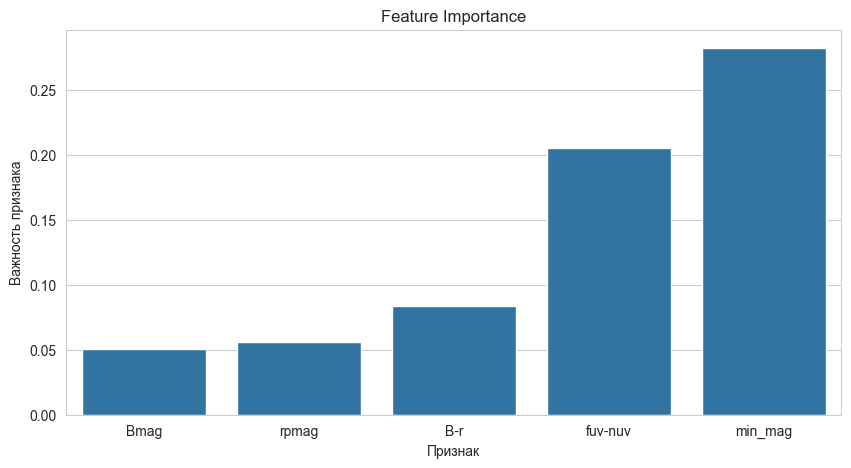

In [9]:
importances = model.feature_importances_
features = train_X.columns

indices = np.argsort(importances)[::-1]

top5_features = features[indices[:5]]
top5_importances = importances[indices[:5]]

plt.figure(figsize=(10, 5))
sns.barplot(x=top5_features[::-1], y=top5_importances[::-1])
plt.xlabel("Признак")
plt.ylabel("Важность признака")
plt.title("Feature Importance")
plt.show()

Как можно заметить, лес решил немного иначе: он так же, как и мы, включил излучение в минем и инфракрасном спектрах, но дальше пошли различия: полоса цвета `B-r` и `fuv-nuv`, что говорит о том, что конкретное значение звездной величины менее информативно, чем ширина спектра в двух (например) фильтрах. Кроме того, вместо амплитуды было добавлено лишь минимальное значение звездной величины.

Цветовые индексы важны, потому что отражают то, насколько звезда может менять свою светимость в некотором диапазоне, причем в отличие от амплитуды, эти данные напрямую коррелируют с цветом звезды.

## **Настройка гиперпараметров с помощью `GridSearchCV`**

In [14]:
improved_model = RandomizedSearchCV(model, {
    "n_estimators": [80, 100, 120],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.05, 0.10, 0.15],
}, n_jobs=-1, cv=3, random_state=42)
improved_model.fit(train_X, train_Y)
# 2 минуты Карл... (это при включенной многопоточности n_jobs=-1 и пониженной cv (по дефолту 5))

,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [80, 100, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [13]:
print(classification_report(test_Y, improved_model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15103
           1       0.80      0.59      0.68      1787

    accuracy                           0.94     16890
   macro avg       0.88      0.78      0.82     16890
weighted avg       0.94      0.94      0.94     16890



Все параметры у альянса деревьев столь же чувствительны, сколь у обычного дерева, например, `n_estimators` при увеличении будет давать лучший результат, однако после определенного значения, модель начнет сильно переобучаться, из-за чего на тестовой выборке результаты станут сильно хуже.

`learning_rate` отвечает за вклад каждого дерева на итоговый результат, мЕньшее значение дает бОльшую устойчивость, поскольку результат получается более взвешенным (свеого рода математическое ожидание), но при этом сильно страдает производительность.

## **Диаграмма рассеяния объектов**

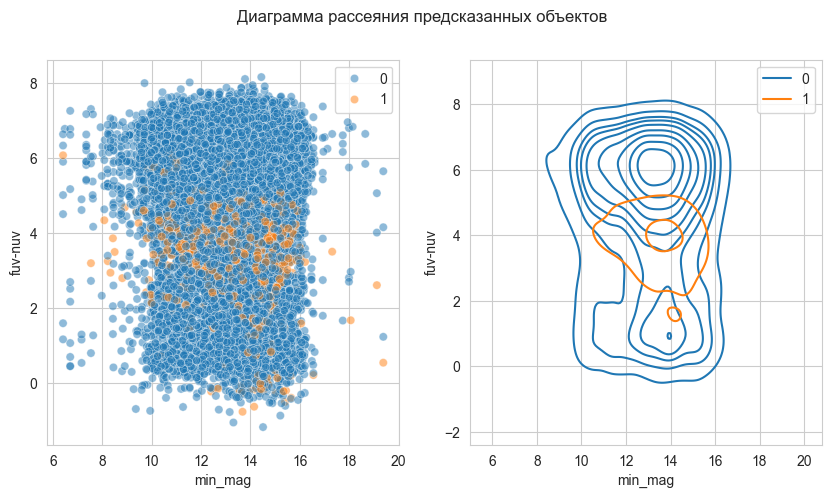

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(
    x=test_X["min_mag"], y=test_X["fuv-nuv"], hue=improved_model.predict(test_X), alpha=0.5, ax=ax1
)
sns.kdeplot(
    x=test_X["min_mag"], y=test_X["fuv-nuv"], hue=improved_model.predict(test_X), ax=ax2
)
plt.suptitle("Диаграмма рассеяния предсказанных объектов")
plt.show()

По сравнению с моделями, полученным на семинаре, наша имеет чуть более сгруппированную линию, вдоль которой располагается "положительный" класс.

Основная идея в том, что обычное дерево четко и резко разделяет классы, из-за чего разделение работает не всегда верно, поскольку слишком грубо относится к данным. Просто альянс деревьев (такой, как `RandomClassifier`) смягчает это разбиение путем "взвешивания" ответа каждого дерева. Наконец, `GradientBoostingClassifier` вовсе делает линию максимально плавной, поскольку каждое новое дерево действует не независимо, а с учетом результатов предыдущих, т.е. итеративно дообучается.